In [ ]:
! mkdir dcgan-weight
! mkdir dcgan-loss
! mkdir dcgan-images
! pip install tqdm

    100% |████████████████████████████████| 51kB 1.8MB/s 


In [ ]:
! wget https://www.dropbox.com/s/ywyf4grxmdch1tj/FemaleDigitsEkush.csv
! wget https://www.dropbox.com/s/clc1g2fg5yqy1qp/MaleDigitsEkush.csv

--2018-08-15 16:51:41--  https://www.dropbox.com/s/ywyf4grxmdch1tj/FemaleDigitsEkush.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/ywyf4grxmdch1tj/FemaleDigitsEkush.csv [following]
--2018-08-15 16:51:41--  https://www.dropbox.com/s/raw/ywyf4grxmdch1tj/FemaleDigitsEkush.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc1fcde3a5f7c8b312e774f81ffb.dl.dropboxusercontent.com/cd/0/inline/AOB5shDpC2uMq2kMdkJmR7nA498g9CAJd9ow-WwVdUhz5jMkwzBhnwLOpT9gVJX_6R_Y_xJmoustC4lHW-tFHIdIKUVkHVFxj7Erteu_JR9YkJOWspnfdorKGcgziSmuip3hxOjxBBo7Bl3h8H06rDA_OVfEx1hJdFUda6ZiWmALbnfWC-xH3IPi3l1Ib_v8dII/file [following]
--2018-08-15 16:51:41--  https://uc1fcde3a5f7c8b312e774f81ffb.dl.dropboxusercontent.com/cd/0/inline/AOB5shDpC2uMq2kMdkJmR

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Reshape, Flatten, Dropout
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.layers.normalization import BatchNormalization

from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam
from keras.datasets import mnist

from tqdm import tqdm
import numpy as np
import random

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

import itertools

from keras.utils.np_utils import to_categorical
from keras.layers import Lambda, Dense, Dropout, Flatten, Conv2D, MaxPool2D,BatchNormalization
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.models import  Sequential
from keras.callbacks import EarlyStopping,ReduceLROnPlateau

# Set the random seed
random_seed = 42
np.random.seed(random_seed)
%matplotlib inline

from sklearn.utils import shuffle

Using TensorFlow backend.


In [ ]:
# train = pd.read_csv("BanglaLekhaDigits.csv").dropna()
# train = pd.read_csv("CMATERdbDigits.csv").dropna()
# train = pd.read_csv("FemaleDigitsEkush.csv").dropna()
# train = pd.read_csv("ISITrainInvertDigits.csv").dropna()
# train5 = pd.read_csv("MaleDigitsEkush.csv").dropna()


# frames = [pd.read_csv("BanglaLekhaDigits.csv").dropna(), pd.read_csv("CMATERdbDigits.csv").dropna(), pd.read_csv("FemaleDigitsEkush.csv").dropna(),
#          pd.read_csv("ISITrainInvertDigits.csv").dropna(), pd.read_csv("MaleDigitsEkush.csv").dropna()]


train = pd.concat([pd.read_csv("FemaleDigitsEkush.csv").dropna(), pd.read_csv("MaleDigitsEkush.csv").dropna()])

train = shuffle(train,random_state=2)

# del train1, train2, train3,train4, train5, frames 

train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
1150,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6396,0,4,0,2,0,2,2,0,0,2,...,6,0,3,0,0,0,0,0,0,4
14294,0,0,1,0,0,0,0,1,0,0,...,2,0,0,5,0,0,0,0,0,9
1335,0,3,0,0,4,1,0,4,4,0,...,6,9,0,0,1,1,1,0,0,0
8168,1,0,3,0,0,4,0,2,2,0,...,0,10,0,0,0,0,0,0,0,5


In [ ]:
y_train = train["label"]
X_train = train.drop(labels = ["label"],axis = 1) 

Total 30130


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


8    3018
9    3016
4    3016
7    3014
3    3014
1    3014
6    3012
0    3012
2    3008
5    3006
Name: label, dtype: int64

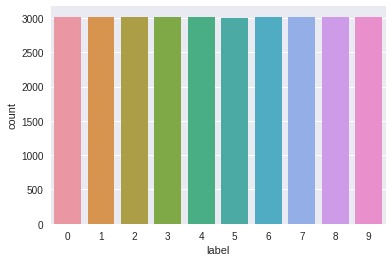

In [ ]:
g = sns.countplot(y_train)

print('Total', len(y_train))
y_train.value_counts()

In [ ]:
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [ ]:
X_train = X_train / 127.5 - 1.0
X_train.astype('float32')
X_train = X_train.values.reshape(-1,28,28,1)

print('Train set:',np.unique(y_train))
del train

Train set: [0 1 2 3 4 5 6 7 8 9]


In [ ]:
len(y_train)

30130

In [ ]:
def Generator():
  
    model = Sequential()
    model.add(Dense(1024, input_dim=100))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(128*7*7))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Reshape((7, 7, 128), input_shape=(128*7*7,)))
    model.add(UpSampling2D((2, 2)))
    model.add(Conv2D(64, kernel_size=(5, 5), padding='same'))   
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(UpSampling2D((2, 2)))
    model.add(Conv2D(1, kernel_size=(5, 5), padding='same'))
    model.add(Activation('tanh'))
    return model

def Discriminator():
    model = Sequential()

    model.add(Conv2D(64, kernel_size=(5, 5), strides=(2, 2), padding='same', input_shape=(28, 28, 1)))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(128, kernel_size=(5, 5), strides=(2, 2)))
    model.add(LeakyReLU(0.2))
    model.add(Flatten())
    model.add(Dense(256))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    optimizer = Adam(lr=1e-5, beta_1=0.1)
    model.compile(loss='binary_crossentropy', optimizer=optimizer)
    return model

def DCGAN(generator, discriminator):

    discriminator.trainable = False

    model = Sequential()

    model.add(generator)
    model.add(discriminator)

    optimizer = Adam(lr=2e-4, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=optimizer)

    return model

In [ ]:
# !wget 'https://www.dropbox.com/s/orqu1d7wohadpv1/ganw.h5'
# !wget 'https://www.dropbox.com/s/orqu1d7wohadpv1/disw.h5'
# !wget 'https://www.dropbox.com/s/orqu1d7wohadpv1/GAN2w.h5'

In [ ]:
generator = Generator()
discriminator = Discriminator()
gan = DCGAN(generator, discriminator)

# generator.load_weights('ganw.h5')
# discriminator.load_weights('disw.h5')
# gan.load_weights('GAN2w.h5')
# generator.summary()
# from keras.models import load_model
# generator = load_model('dcgan-weight/generatorsave.h5')
# discriminator =load_model('dcgan-weight/discriminatorsave.h5')
# gan = load_model('dcgan-weight/gansave.h5')

In [ ]:
epochs = 50
batch_size = 32
input_size = 100

num_batches = int(X_train.shape[0] / batch_size)

pbar = tqdm(total=epochs * num_batches)

gan_loss = []
discriminator_loss = []

for epoch in range(epochs):

    for index in range(num_batches):
        
        pbar.update(1)

        # Generative data
        noise = np.random.uniform(-1, 1, size=[batch_size, input_size])
        generated_data = generator.predict_on_batch(noise)

        # Training data chosen from Mnist samples
        training_data = X_train[index * batch_size: (index + 1) * batch_size]

        X = np.vstack((generated_data, training_data))
        y = np.zeros(2 * batch_size)
        y[:batch_size] = 1

        # Train discriminator
        d_loss = discriminator.train_on_batch(x=X, y=y)

        # Train generator (Seemingly train GAN but the discriminator in the model is disabled to train.)
        noise = np.random.uniform(-1, 1, size=[batch_size, input_size])
        y = np.zeros(batch_size)
        g_loss = gan.train_on_batch(x=noise, y=y)

        discriminator_loss.append(d_loss)
        gan_loss.append(g_loss)
        
        img = generated_images = generator.predict(noise)

    # Plot losses
    fig = plt.figure(figsize=(10, 5))        
    fig.suptitle('epoch: ' + str(epoch + 1))
    plt.plot(discriminator_loss, label="discriminator's loss", color='b')
    plt.plot(gan_loss, label="generator's loss", color='r')
    plt.xlim([0, epochs * num_batches])
    plt.legend()
    plt.savefig('./dcgan-loss/' + str(epoch + 1) + '.png')
    plt.close() 
#     print(discriminator_loss, gan_loss)

    # Visualize generated data
    generated_images = generator.predict(noise)

    fig = plt.figure(figsize=(9, 9))        
    for i in range(9):
        plt.subplot(3, 3, i+1)
        img = generated_images[i, :] * 0.5 + 0.5
        img = img.reshape((28, 28))
        plt.tight_layout()
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    plt.savefig('./dcgan-images/' + str(epoch + 1) + '.png')
    plt.close()
    
    generator.save_weights('dcgan-weight/generatorsave_weights.h5')
    discriminator.save_weights('dcgan-weight/discriminatorsave_weights.h5')
    gan.save_weights('dcgan-weight/gansave_weights.h5')

    generator.save('dcgan-weight/generatorsave.h5')
    discriminator.save('dcgan-weight/discriminatorsave.h5')
    gan.save('dcgan-weight/gansave.h5')
    print(discriminator_loss[-1])
    
        
pbar.close()

  0%|          | 0/47050 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:975: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
  2%|▏         | 944/47050 [00:55<5:02:40,  2.54it/s]

0.698603


  4%|▍         | 1886/47050 [01:44<3:11:21,  3.93it/s]

0.69542503


  6%|▌         | 2827/47050 [02:34<3:04:37,  3.99it/s]

0.688458


  8%|▊         | 3767/47050 [03:23<3:01:40,  3.97it/s]

0.6874312


 10%|█         | 4708/47050 [04:13<2:46:51,  4.23it/s]

0.6942483


 12%|█▏        | 5650/47050 [05:03<3:10:20,  3.63it/s]

0.6892656


 14%|█▍        | 6591/47050 [05:53<2:01:50,  5.53it/s]

0.6915064


 16%|█▌        | 7532/47050 [06:42<2:47:21,  3.94it/s]

0.6884935


 18%|█▊        | 8474/47050 [07:32<2:43:17,  3.94it/s]

0.7045289


 20%|██        | 9413/47050 [08:22<2:49:24,  3.70it/s]

0.6957953


 22%|██▏       | 10355/47050 [09:13<2:37:51,  3.87it/s]

0.6821649


 24%|██▍       | 11296/47050 [10:03<2:32:47,  3.90it/s]

0.6924675


 26%|██▌       | 12236/47050 [10:53<2:48:30,  3.44it/s]

0.6843642


 28%|██▊       | 13178/47050 [11:44<2:24:46,  3.90it/s]

0.6895639


 30%|███       | 14118/47050 [12:34<2:22:54,  3.84it/s]

0.6875146


 32%|███▏      | 15059/47050 [13:24<1:39:35,  5.35it/s]

0.6877129


 34%|███▍      | 16001/47050 [14:14<2:13:34,  3.87it/s]

0.6963018


 36%|███▌      | 16941/47050 [15:04<1:58:48,  4.22it/s]

0.69206655


 38%|███▊      | 17883/47050 [15:54<2:05:24,  3.88it/s]

0.6795329


 40%|████      | 18823/47050 [16:44<1:57:15,  4.01it/s]

0.6941141


 42%|████▏     | 19764/47050 [17:34<1:59:54,  3.79it/s]

0.68686354


 44%|████▍     | 20706/47050 [18:25<2:10:14,  3.37it/s]

0.6945307


 46%|████▌     | 21647/47050 [19:15<1:49:46,  3.86it/s]

0.6864896


 48%|████▊     | 22588/47050 [20:05<1:47:57,  3.78it/s]

0.6868619


 50%|█████     | 23528/47050 [20:55<1:42:34,  3.82it/s]

0.6821134


 52%|█████▏    | 24469/47050 [21:45<1:39:40,  3.78it/s]

0.678014


 54%|█████▍    | 25410/47050 [22:35<1:29:47,  4.02it/s]

0.67999625


 56%|█████▌    | 26351/47050 [23:25<1:31:04,  3.79it/s]

0.69336444


 58%|█████▊    | 27292/47050 [24:15<1:19:48,  4.13it/s]

0.67655027


 60%|██████    | 28234/47050 [25:06<1:24:12,  3.72it/s]

0.6866269


 62%|██████▏   | 29174/47050 [25:56<1:16:10,  3.91it/s]

0.6860187


 64%|██████▍   | 30115/47050 [26:46<1:29:33,  3.15it/s]

0.6989881


 66%|██████▌   | 31057/47050 [27:37<1:10:48,  3.76it/s]

0.67888707


 68%|██████▊   | 31997/47050 [28:27<1:08:01,  3.69it/s]

0.6937872


 70%|███████   | 32939/47050 [29:17<1:04:23,  3.65it/s]

0.6883664


 72%|███████▏  | 33880/47050 [30:07<1:00:02,  3.66it/s]

0.68502486


 74%|███████▍  | 34821/47050 [30:57<55:49,  3.65it/s]  

0.686647


 76%|███████▌  | 35762/47050 [31:47<51:30,  3.65it/s]  

0.6893588


 78%|███████▊  | 36702/47050 [32:38<47:15,  3.65it/s]  

0.66951823


 80%|████████  | 37643/47050 [33:28<30:30,  5.14it/s]

0.7125556


 82%|████████▏ | 38584/47050 [34:18<39:07,  3.61it/s]

0.684146


 84%|████████▍ | 39526/47050 [35:08<24:07,  5.20it/s]

0.6948433


 86%|████████▌ | 40466/47050 [35:58<30:18,  3.62it/s]

0.67567337


 88%|████████▊ | 41408/47050 [36:49<25:09,  3.74it/s]

0.67938113


 90%|█████████ | 42348/47050 [37:39<27:14,  2.88it/s]

0.67580986


 92%|█████████▏| 43290/47050 [38:30<16:43,  3.75it/s]

0.67723316


 94%|█████████▍| 44231/47050 [39:20<12:56,  3.63it/s]

0.662385


 96%|█████████▌| 45171/47050 [40:10<08:33,  3.66it/s]

0.6659339


 98%|█████████▊| 46112/47050 [41:01<04:20,  3.60it/s]

0.6766592


100%|██████████| 47050/47050 [41:49<00:00, 19.24it/s]

0.67150974


In [ ]:
!zip -r images21.zip 'dcgan-images'
!zip -r loss21.zip 'dcgan-loss'
!zip -r weight21.zip 'dcgan-weight'

from google.colab import files

files.download('loss21.zip')
files.download('weight21.zip')
files.download('images21.zip')

updating: dcgan-images/ (stored 0%)
updating: dcgan-images/25.png (deflated 22%)
updating: dcgan-images/47.png (deflated 22%)
updating: dcgan-images/9.png (deflated 22%)
updating: dcgan-images/32.png (deflated 21%)
updating: dcgan-images/30.png (deflated 23%)
updating: dcgan-images/41.png (deflated 24%)
updating: dcgan-images/18.png (deflated 23%)
updating: dcgan-images/16.png (deflated 23%)
updating: dcgan-images/38.png (deflated 22%)
updating: dcgan-images/49.png (deflated 23%)
updating: dcgan-images/6.png (deflated 21%)
updating: dcgan-images/39.png (deflated 23%)
updating: dcgan-images/12.png (deflated 23%)
updating: dcgan-images/15.png (deflated 22%)
updating: dcgan-images/5.png (deflated 22%)
updating: dcgan-images/14.png (deflated 23%)
updating: dcgan-images/33.png (deflated 22%)
updating: dcgan-images/8.png (deflated 21%)
updating: dcgan-images/44.png (deflated 22%)
updating: dcgan-images/40.png (deflated 22%)
updating: dcgan-images/26.png (deflated 23%)
updating: dcgan-images/

----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 33154, 0, 0)
Traceback (most recent call last):
  File "/usr/lib/python3.6/socketserver.py", line 317, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 348, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 361, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.6/socketserver.py", line 696, in __init__
    self.handle()
  File "/usr/lib/python3.6/http/server.py", line 418, in handle
    self.handle_one_request()
  File "/usr/lib/python3.6/http/server.py", line 406, in handle_one_request
    method()
  File "/usr/lib/python3.6/http/server.py", line 639, in do_GET
    self.copyfile(f, self.wfile)
  File "/usr/lib/python3.6/http/server.py", line 800, in copyfile
    shutil.copyfil

In [ ]:
# 21
for i in discriminator_loss:
  print(discriminator_loss[-1], end=' ')
print()
print(min(discriminator_loss))

0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974 0.67150974